#**Importing Data**

In [ ]:
import pandas as pd
import requests
import io

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import plotly.figure_factory as ff
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD


Access Data

In [ ]:
url = 'https://drive.google.com/uc?id=1RkoTj_yc3o99xDfzmE8q7QFURhf3FwdS'
df = pd.read_csv(io.StringIO(requests.get(url).content.decode("utf-8")))
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
print("Demension of the dataset:")
df.shape

Demension of the dataset:


(4424, 35)

#**Data Preprocessing**


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print("Target : ")
print(df['Target'].unique())

Target : 
['Dropout' 'Graduate' 'Enrolled']


As we can see, there are three different elements in "Target". So, we can assign that: Dropout = 0, Graduate = 1, Enrolled = 2.

In [ ]:
class_mapping = {'Dropout': 0, 'Graduate': 1, 'Enrolled' : 2}
df['Target'] = df['Target'].map(class_mapping)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


mannually drop 6 relatively useless attributes

In [ ]:
df_ohe = df.copy()
df_ohe.drop(columns=['Marital status'], axis=1, inplace=True)
df_ohe.drop(columns=['Nacionality'], axis=1, inplace=True)
df_ohe.drop(columns=['Educational special needs'], axis=1, inplace=True)
df_ohe.drop(columns=['International'], axis=1, inplace=True)
df_ohe

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,8,5,2,1,1,13,10,6,10,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,6,1,11,1,1,1,3,4,4,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,5,5,1,1,22,27,10,10,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,8,2,15,1,1,23,27,6,4,1,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,12,1,3,0,1,22,28,10,10,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,15,1,1,1,1,6,5,0,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,2,15,1,1,1,1,10,10,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,12,1,1,22,27,10,10,1,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,9,1,1,22,27,8,5,1,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


**Preprocessing one-hot encoding**

By the Data Description, we can know Application order, Age at enrollment, Curricular units 1st sem (credited),
Curricular units 1st sem (enrolled),
Curricular units 1st sem (evaluations),
Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), curricular units 2nd sem (enrolled)	Curricular units 2nd sem (evaluations),	Curricular units 2nd sem (approved),	Curricular units 2nd sem (grade),	Curricular units 2nd sem (without evaluations),	Unemployment rate, Inflation rate and GDP are numerical variables. 

If it is not a numerical variable, then it is a categorical variable.

In order to use one-hot encoding, we need to convert categorical variables into a numerical representation.

Thus, we need to one hot encode those categorical variables.


In [ ]:
cats = ['Marital status',	'Application mode', 'Daytime/evening attendance',	'Previous qualification', 'Nacionality',	"Mother's qualification",	"Father's qualification",	"Mother's occupation", \
         "Father's occupation", 'Debtor', 'Gender',	'Scholarship holder', 'Course', 'International','Tuition fees up to date', 'Educational special needs','Displaced'] 
column_names = df_ohe.columns.tolist()
cats_set = set(cats)
names_set = set(column_names)

cats = names_set.intersection(cats_set)
print("Unique elements:")
for cat in cats:
    print(df_ohe[cat].unique()) 


Unique elements:
[1 0]
[1 0]
[10  4  8 11  6  9  5  2  3 22  7  1 12 39 19 13 29 46 43 34 44 30 41 24
 23 45 35 26 28 36 16 37 31 42 20 15 40 25 21 17 32 38 27 18 14 33]
[10  3 27 28  1 14  5  4 24  2 29  9  7 26 18 30 12 15 25 31 16 11 20 33
 13 32  8  6 21 17 34 23 19 22]
[ 2 11  5 15  3 17 12 10 14 16  6  8 13  9  4  1  7]
[0 1]
[1 0]
[0 1]
[ 8  6  1 12  9 17 15 16 14  4 13  7  3  2  5 18 10 11]
[1 0]
[ 6  4 10  8  5  2 16  1  7  3 12  9 20 28 13 29 23 32 30 18 24 19 11 21
 15 27 31 14 22 17 26 25]
[13  1 22 23  3  4 27  2 19 10 25  7  5 24  9 26 18 11 20 21  6  8 17 28
 12 14 16 15 29]
[ 1 12 16 14  8  3 15  2  4  9 17 11  6  7 13  5 10]


In [ ]:
print(df.columns[df.isna().any()])
df_ohe = df_ohe.fillna(0)

Index([], dtype='object')


In [ ]:
print(df_ohe.shape)
display(df_ohe.head(5))

(4424, 31)


,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,8,5,2,1,1,13,10,6,10,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,6,1,11,1,1,1,3,4,4,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,5,5,1,1,22,27,10,10,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,8,2,15,1,1,23,27,6,4,1,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,12,1,3,0,1,22,28,10,10,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [ ]:

df_ohe = pd.get_dummies(df_ohe, columns=cats)
df_ohe

<ipython-input-11-9397a0f5fdb8>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_ohe = pd.get_dummies(df_ohe, columns=cats)


,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),...,Previous qualification_8,Previous qualification_9,Previous qualification_10,Previous qualification_11,Previous qualification_12,Previous qualification_13,Previous qualification_14,Previous qualification_15,Previous qualification_16,Previous qualification_17
0,5,20,0,0,0,0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,19,0,6,6,6,14.000000,0,0,6,...,0,0,0,0,0,0,0,0,0,0
2,5,19,0,6,0,0,0.000000,0,0,6,...,0,0,0,0,0,0,0,0,0,0
3,2,20,0,6,8,6,13.428571,0,0,6,...,0,0,0,0,0,0,0,0,0,0
4,1,45,0,6,9,5,12.333333,0,0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,6,19,0,6,7,5,13.600000,0,0,6,...,0,0,0,0,0,0,0,0,0,0
4420,2,18,0,6,6,6,12.000000,0,0,6,...,0,0,0,0,0,0,0,0,0,0
4421,1,30,0,7,8,7,14.912500,0,0,8,...,0,0,0,0,0,0,0,0,0,0
4422,1,20,0,5,5,5,13.800000,0,0,5,...,0,0,0,0,0,0,0,0,0,0


Data Transformation for Numerical attributes

In [ ]:
column_names = df_ohe.columns.tolist()

cats_set = set(cats)
names_set = set(column_names)

common_strings = names_set.intersection(cats_set)

nats =  [item for item in names_set if item not in common_strings] # numerical attributes
nats.remove('Target')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


numeric_df = df_ohe[nats]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_df)

scaled_df = pd.DataFrame(scaled_data, columns=nats)

df_ohe[nats] = scaled_df

print("Normalized data:")
print(df_ohe)



Normalized data:
      Application order  Age at enrollment  \
0              0.555556           0.056604   
1              0.111111           0.037736   
2              0.555556           0.037736   
3              0.222222           0.056604   
4              0.111111           0.528302   
...                 ...                ...   
4419           0.666667           0.037736   
4420           0.222222           0.018868   
4421           0.111111           0.245283   
4422           0.111111           0.056604   
4423           0.111111           0.094340   

      Curricular units 1st sem (credited)  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
4419                                  0.0   
4420                                  0.0   
4421                     

In [ ]:
df_ohe.drop(df_ohe[df_ohe["Target"]==2].index,inplace=True)

In [ ]:
print("Features of the dataset :")
print(df.describe(include = 'all'))

Features of the dataset :
       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
mi

# **Exploratory Data Analysis**

In [ ]:
#will use mostly bar graphs to visualize and explore some data
#since there are many (35) factors/columns, will only explore some data
#data description and eda section in report is only 1-2 pages
import seaborn as sns
url = 'https://drive.google.com/uc?id=1RkoTj_yc3o99xDfzmE8q7QFURhf3FwdS'
edadf = pd.read_csv(io.StringIO(requests.get(url).content.decode("utf-8")))
eda = edadf.copy()
# display(eda)

The following plots will show a basic overview of some column/attribute data for visualization purposes.

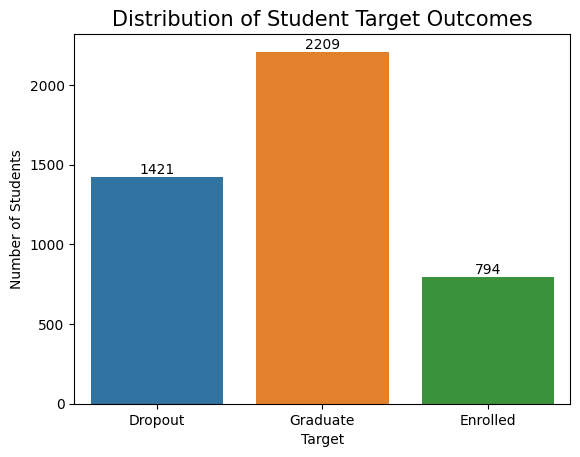

In [ ]:
#basic overview of Target data counts
ax = sns.countplot(x=eda["Target"])
plt.title('Distribution of Student Target Outcomes', size=15)
plt.xlabel('Target')
plt.ylabel('Number of Students')

for label in ax.containers:
    ax.bar_label(label)

plt.show()

In [ ]:
total_students = 1421+2209+794
print("Total Students:", total_students)
print("Dropout:" + ' {0:.2f}'.format(1421/total_students*100) + "%")
print("Graduate:" + ' {0:.2f}'.format(2209/total_students*100) + "%")
print("Enrolled:" + ' {0:.2f}'.format(794/total_students*100) + "%")

Total Students: 4424
Dropout: 32.12%
Graduate: 49.93%
Enrolled: 17.95%


Most students in our dataset have graduated compared to dropped out. For our topic, we will drop Enrolled row values from the dataset. Enrolled does not answer our question because we need to know if the student has either graduated or dropped out. Enrolled just tells us that they are still in school and in progress.

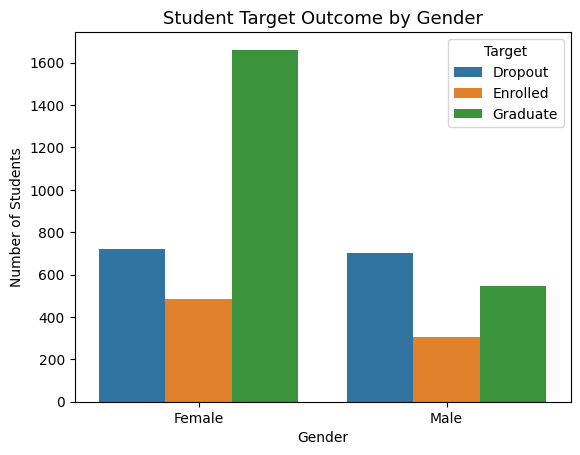

In [ ]:
#overview of student outcome target counts by gender
sns.countplot(data=eda, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.title('Student Target Outcome by Gender', size=13)
plt.ylabel('Number of Students')
plt.show()

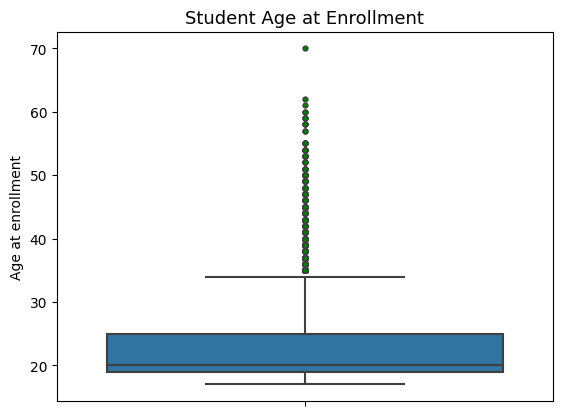

Average age at enrollment: 23


In [ ]:
#Example of looking for any outliers, in this case for the particular numerical attribute: age of enrollment
sns.boxplot(y='Age at enrollment', flierprops={"marker":"o", "markerfacecolor":"green", "markersize":3.5,}, data=eda)
plt.title('Student Age at Enrollment', size=13)
plt.show()
#note that round() will round down 2.49 to 2 and round up 2.5 to 3
print("Average age at enrollment:", round(np.mean(eda['Age at enrollment'])))

Quick basic overview of simple demographic data using gender and age at enrollment.

GENDER: Female has more graduates in this data.

AGE AT ENROLLMENT: Average age of students in this data are younger at around 23 years old. The outliers start at 35 and onwards.

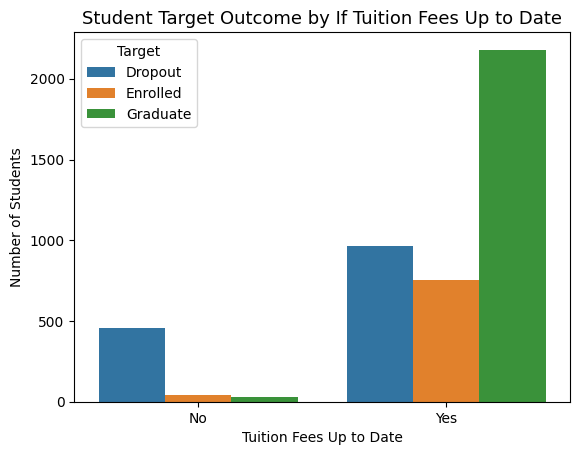

In [ ]:
#overview of student outcome target counts by if tuition fees up to date
sns.countplot(data=eda, x="Tuition fees up to date", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.title('Student Target Outcome by If Tuition Fees Up to Date', size=13)
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Number of Students')
plt.show()


The majority of students that have graduated had tuition fees up to date. There is also a number of students that have dropped out that also had tuition fees up to date.

However, take note how the majority of students that did not have tuition fees up to date dropped out.

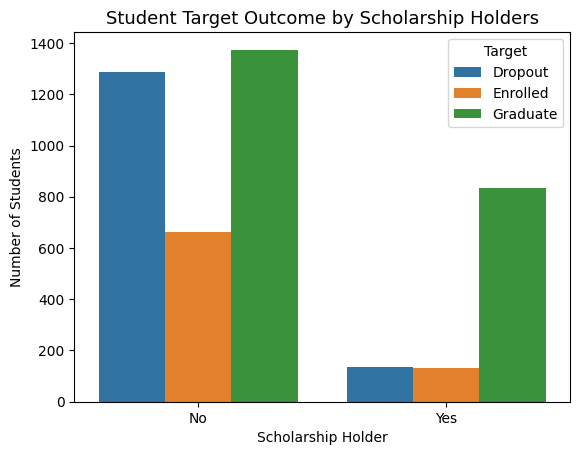

In [ ]:
#overview of student outcome target counts by scholarship holders
sns.countplot(data=eda, x="Scholarship holder", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.title('Student Target Outcome by Scholarship Holders', size=13)
plt.xlabel('Scholarship Holder')
plt.ylabel('Number of Students')
plt.show()

Majority of scholarship holders ended up graduating.

Majority of non scholarship holders also graduated. 

However, take note of how many students that dropped out were also non scholarship holders. 

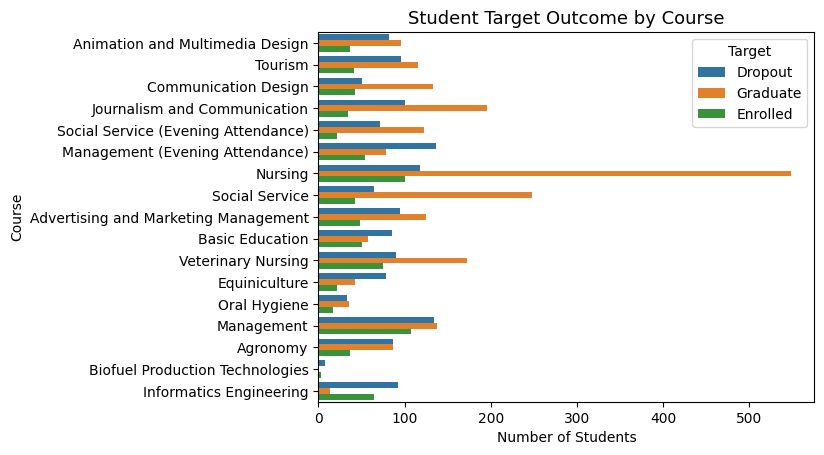

In [ ]:
#overview of student outcome target counts by course taken by students
eda_course = eda.copy()
eda_course['Course'] = eda_course['Course'].replace({1:'Biofuel Production Technologies',2:'Animation and Multimedia Design',3:'Social Service (Evening Attendance)',4:'Agronomy',5:'Communication Design',6:'Veterinary Nursing',7:'Informatics Engineering',8:'Equiniculture',9:'Management',10:'Social Service',11:'Tourism',12:'Nursing',13:'Oral Hygiene',14:'Advertising and Marketing Management',15:'Journalism and Communication',16:'Basic Education',17:'Management (Evening Attendance)'})
# display(eda_course)
ax = sns.countplot(data=eda_course, y="Course", hue="Target")
plt.title('Student Target Outcome by Course', size=13)
plt.xlabel('Number of Students')
plt.ylabel('Course')
plt.yticks(labels=None)
plt.show()

Majority of graduates were enrolled in Nursing, Social Service, Journalism and Communication, and Veterinary Nursing.

Overall, for a basic idea of the data, we looked at a mix of demographic, economic, and academic data to see the student outcomes based on the observed attributes.

These previous basic plots were mostly just for visual purposes.

Now, the next set of plots will dive deeper into the data. 

We will look at correlation (heat map) between the attributes.

We will also look at some important features of our dataset.

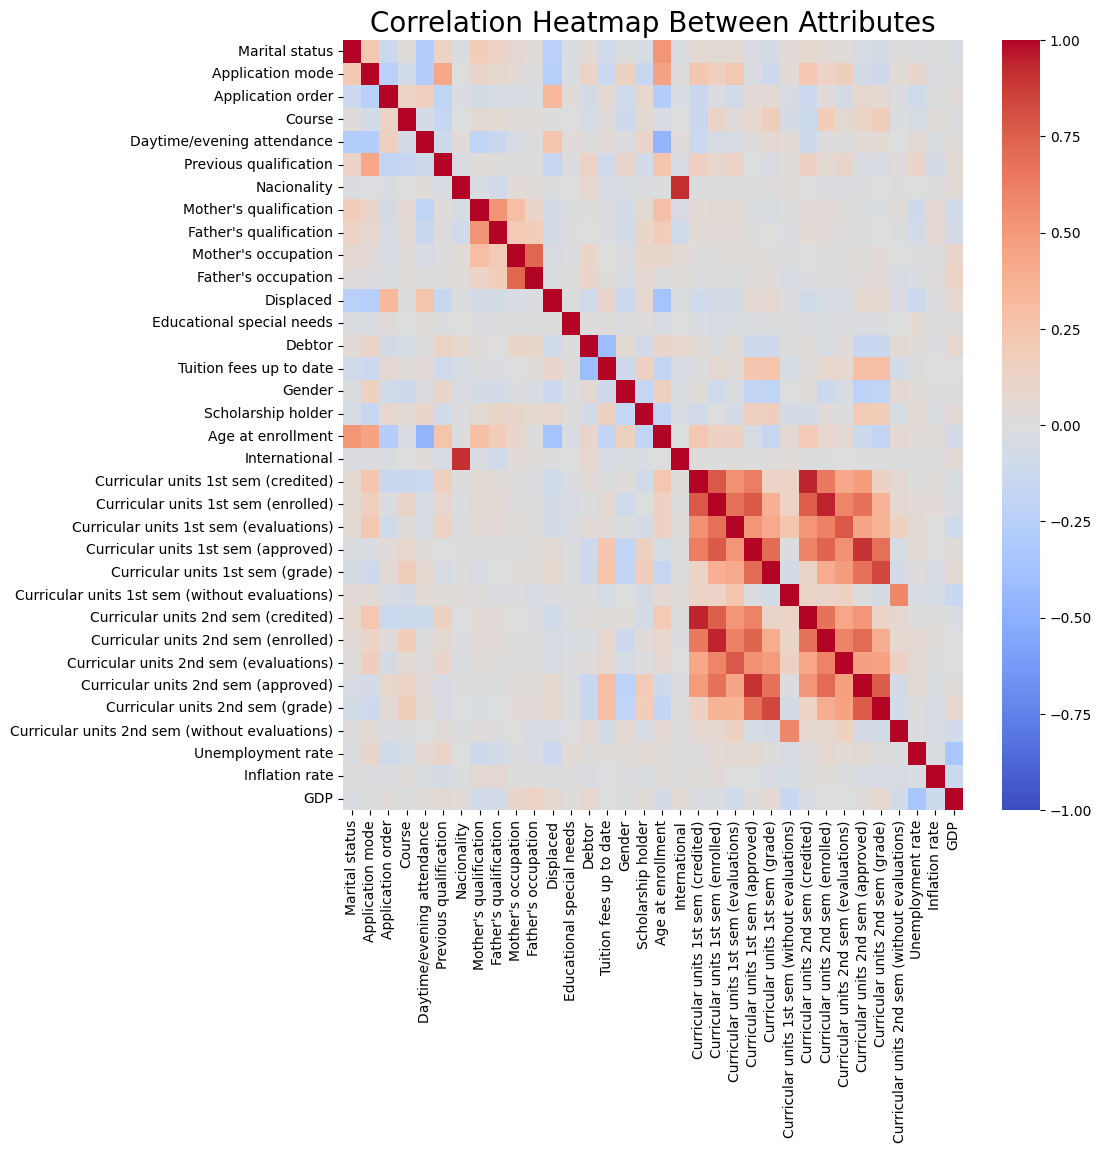

In [ ]:
#make figure bigger because many categories
plt.figure(figsize=(10,10))

#selecting only the numerical columns
eda_heatmap = eda.select_dtypes(include=np.number)
# display(eda_heatmap)

#using correlation method
#too many categories, so no annotations inside the boxes unless the figure is super big
sns.heatmap(eda_heatmap.corr(), vmin=-1, vmax=1, center= 0, cmap='coolwarm')
plt.title('Correlation Heatmap Between Attributes', size=20)
plt.show()

Stronger positive correlations between the groups of categories involved with units enrolled during in school. Note how 2nd semester units positively correlate with 1st semester units. Mostly just tells us that these are continuing students in school. However, note how international and nacionality have high correlation with each other.

In [ ]:
eda_n = eda.copy()
eda_n.Nacionality = eda_n.Nacionality.replace(range(1,22), ['Portuguese', 'German','Spanish', 'Italian', 'Dutch', 'English', 'Lithuania', 'Angolan', 'Cape Verdean', 'Guinean', 'Mozambican', 'Santomean', 'Turkish', 'Brazilian', 'Romanian', 'Republic of Moldovan', 'Mexican', 'Ukranian', 'Russian', 'Cuban', 'Colombian'])
eda_n.Nacionality.value_counts()

Portuguese              4314
Brazilian                 38
Santomean                 14
Cape Verdean              13
Spanish                   13
Guinean                    5
Republic of Moldovan       3
Italian                    3
Ukranian                   3
Angolan                    2
Mexican                    2
Romanian                   2
Mozambican                 2
German                     2
Russian                    2
Turkish                    1
Dutch                      1
Colombian                  1
Cuban                      1
English                    1
Lithuania                  1
Name: Nacionality, dtype: int64

Dataset has dominant amount of Portuguese students which correlates with the international attribute as well. May be useful to drop Nacionality and International attributes because of the bias in these two attributes.

Now, lets look at feature importance using xgboost. Xgboost was one of the techniques mentioned in the paper to find the more important features of this dataset.

In [ ]:
url = 'https://drive.google.com/uc?id=1RkoTj_yc3o99xDfzmE8q7QFURhf3FwdS'
df = pd.read_csv(io.StringIO(requests.get(url).content.decode("utf-8")))
fi_df = df.copy()
# display(nb_df)

#preprocessing

#assign Target values and drop enrolled value
class_mapping = {'Dropout': 0, 'Graduate': 1, 'Enrolled' : 2}
fi_df['Target'] = fi_df['Target'].map(class_mapping)

#drop dupes
fi_df.drop_duplicates(inplace=True)

#look for and fill any na with 0
# print(fi_df.columns[fi_df.isna().any()])
fi_df.columns[fi_df.isna().any()]
fi_df = fi_df.fillna(0)
eda_fi = fi_df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = eda_fi.drop('Target', axis=1)
y = eda_fi['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
#if it doesn't work, please install xgboost
#pip install xgboost
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

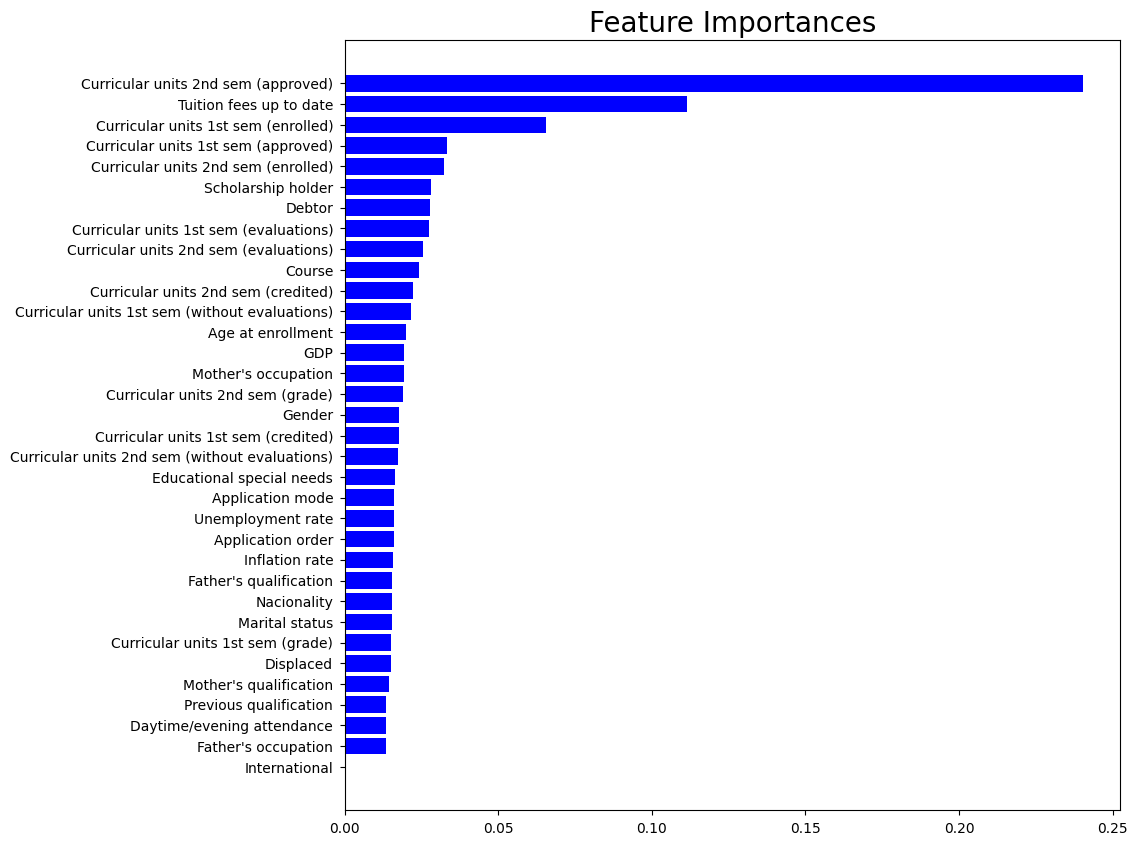

In [ ]:
#sort the bar plot ascending order: higher values to bottom values
importances.sort_values('Importance',inplace=True)

#create plot
#use figsize to adjust size of plot
fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(y=importances['Attribute'], width=importances['Importance'],color='blue')
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=5)
plt.title('Feature Importances', size=20)

plt.show()

This was just one method using xgboost to see what kind of features in our dataset might be important. There are multiple ways to use xgboost but this was a basic way to use xgboost.

It can be seen how curricular units along with some economic features such as scholarship holder and tuition fee status seem to be important features. These types of features may be kept when using the models.

Based on this plot and the heatmap, we could consider dropping some features from the dataset.

# **Polynomial Regression**


In [ ]:
dd = df_ohe.copy()
nb_train, nb_test = train_test_split(dd, test_size=0.2, random_state=0)
X_nb_train, y_nb_train = nb_train.drop(columns=['Target']), nb_train['Target']
X_nb_test, y_nb_test = nb_test.drop(columns=['Target']), nb_test['Target']
print(X_nb_train.shape, X_nb_test.shape)
print(y_nb_train.shape, y_nb_test.shape)

(2904, 222) (726, 222)
(2904,) (726,)


In [ ]:
y_nb_train.head()

781     0
4208    0
2512    1
1536    0
1728    0
Name: Target, dtype: int64

In [ ]:
y_nb_train = np.asarray(y_nb_train).reshape(-1, 1)

In [ ]:
X_poly = np.asarray(X_nb_train)  # No need for PolynomialFeatures in this case

plr = LinearRegression()

plr.fit(X_poly, y_nb_train)

predicted = plr.predict(np.asarray(X_nb_test))

train_predicted = plr.predict(X_poly)

print("Intercept:", plr.intercept_, "Coefficients:", plr.coef_)

print("RMSE: %.2f" % mean_squared_error(y_nb_train, train_predicted, squared=False))
print("R2: %.2f" % r2_score(y_nb_train, train_predicted))

Intercept: [-1.25728306e+12] Coefficients: [[-1.16093147e-02 -5.37348230e-02 -5.63429821e-01 -9.98959662e-02
  -1.51174486e-01  1.16509398e+00 -5.61302149e-02  1.44292544e-01
  -4.41479855e-01 -1.74236199e+00 -3.56956618e-01  2.53955401e+00
  -1.49965093e-01  1.78174382e-01 -3.39813062e-02  2.35105332e-02
   1.77809721e-02  1.35863338e+11  1.35863338e+11 -1.13238626e+11
  -1.13238626e+11  2.88093257e+11  2.88093257e+11  2.88093257e+11
   2.88093257e+11  2.88093257e+11  2.88093257e+11  2.88093257e+11
   2.88093257e+11  2.88093257e+11  2.88093257e+11  2.88093257e+11
   2.88093257e+11  2.88093257e+11  7.95970484e+10  7.95970484e+10
   7.95970484e+10  7.95970484e+10  7.95970484e+10  5.39337048e+09
   7.95970484e+10  4.10864007e+10  1.29656834e+11 -4.88353754e+09
   3.31297952e+09 -3.76357798e+09  7.95970484e+10  7.95970484e+10
   7.95970484e+10  7.95970484e+10  7.95970484e+10  7.95970484e+10
   1.18107696e+11  7.95970484e+10 -1.19135472e+09  2.10301649e+11
   7.95970484e+10  6.10873975e+09

In [ ]:
probabilities = 1 / (1 + np.exp(-predicted))

<ipython-input-34-3779b77e8849>:1: RuntimeWarning: overflow encountered in exp
  probabilities = 1 / (1 + np.exp(-predicted))


In [ ]:
threshold = 0.6

y_pred_labels = np.where(probabilities >= threshold, 1, 0)

print("Accuracy: ",accuracy_score(y_nb_test,y_pred_labels))

Accuracy:  0.8842975206611571


In [ ]:
print(classification_report(y_nb_test,y_pred_labels))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       296
           1       0.85      0.98      0.91       430

    accuracy                           0.88       726
   macro avg       0.90      0.86      0.88       726
weighted avg       0.89      0.88      0.88       726



In [ ]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix: ")
print(confusion_matrix(y_nb_test,y_pred_labels))

Confusion Matrix: 
[[222  74]
 [ 10 420]]


In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(np.asarray(X_nb_train))

X_poly.shape

plr = LinearRegression()

plr.fit(X_poly, y_nb_train)
    
predicted = plr.predict(poly.transform(np.asarray(X_nb_test)))

train_predicted = plr.predict(poly.transform(np.asarray(X_nb_train)))

print("Intercept:", plr.intercept_, "Coefficients:", plr.coef_)

print("RSME: %.2f" % mean_squared_error(y_nb_train, train_predicted, squared = False))
print("R2: %.2f" % r2_score(y_nb_train, train_predicted))


Intercept: [-1.20182666e+11] Coefficients: [[ 1.93539099e+10 -4.98726854e+11 -5.58345909e+11 ...  1.73528564e+10
   0.00000000e+00  1.71978488e+10]]
RSME: 0.05
R2: 0.99


In [ ]:
probabilities = 1 / (1 + np.exp(-predicted))

<ipython-input-39-3779b77e8849>:1: RuntimeWarning: overflow encountered in exp
  probabilities = 1 / (1 + np.exp(-predicted))


In [ ]:
threshold = 0.3

y_pred_labels = np.where(probabilities >= threshold, 1, 0)

print("Accuracy: ",accuracy_score(y_nb_test,y_pred_labels))

Accuracy:  0.5964187327823691


In [ ]:
print(classification_report(y_nb_test,y_pred_labels))

              precision    recall  f1-score   support

           0       0.51      0.43      0.46       296
           1       0.64      0.71      0.68       430

    accuracy                           0.60       726
   macro avg       0.57      0.57      0.57       726
weighted avg       0.59      0.60      0.59       726



In [ ]:
print("Confusion Matrix: ")
print(confusion_matrix(y_nb_test,y_pred_labels))


Confusion Matrix: 
[[126 170]
 [123 307]]


By comparing the accuracy of degree 1 and degree 2 polynomial regressions, it becomes evident that the interpretation and modeling approach using linear regression followed by the sigmoid function is better than degree = 2. This is due to the overfitting issue observed when using degree 2 polynomial regression.

# **Logistic Regression**

*split* the data by 8:2

In [ ]:
data = df_ohe.copy()
train, test = train_test_split(data, test_size=0.2, random_state=42)

X_train, y_train = train.drop(columns=['Target']) ,train['Target']
X_test, y_test = test.drop(columns=['Target']), test['Target']


train the model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
print(classification_report(y_test, lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       277
           1       0.89      0.95      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



In [ ]:
y_pred = lr_model.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.8994490358126722


In [ ]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix: 
[[225  52]
 [ 21 428]]


K-fold Cross Validation for logistic function

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

accuracy_scores = []

X = data.drop('Target', axis = 1)
y = data['Target']

X = X.values
y = y.values

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lr_model = LogisticRegression(max_iter = 10000)

    lr_model.fit(X_train, y_train)

    y_pred = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

average_accuracy = np.mean(accuracy_scores)

print("Accuracy scores:", accuracy_scores)
print("Average accuracy:", average_accuracy)

Accuracy scores: [0.9146005509641874, 0.9104683195592287, 0.9077134986225895, 0.9008264462809917, 0.9104683195592287]
Average accuracy: 0.9088154269972453


In [ ]:
#for frontend 
pickle.dump(lr_model, open('model.pkl', 'wb'))

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[251  52]
 [ 13 410]]


K-fold cross validation for logistic regression improved 1% accuracy. Thus, K-fold cross validation for logistic regression is better.

# **Neural Network**

In [ ]:

df2 = df_ohe.copy()
X = df2.drop('Target', axis = 1)
y = df2['Target']

# normalize data0
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

set_of_classes = y.value_counts().index.tolist()
set_of_classes= pd.DataFrame({'Target': set_of_classes})
y = pd.get_dummies(y)

print("Pre-processed data :")
print(X)

print("Pre-processed class :")
print(y)

#splitting data into ratio 90:10
data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.1)

# Number of nodes in each hidden layer should be (12, 3)
# Learning rate should be 0.3
# Number of epochs should be 500
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)
mlp

mlp2 = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 70, hidden_layer_sizes = (12, 3), max_iter = 500)
mlp2

mlp3 = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'tanh', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)
mlp3

mlp4 = MLPClassifier(solver = 'lbfgs', random_state = 42, activation = 'tanh', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 3000)
mlp4

mlp5 = MLPClassifier(solver = 'lbfgs', random_state = 42, activation = 'logistic', learning_rate_init = 0.3, batch_size = 100, hidden_layer_sizes = (12, 3), max_iter = 500)
mlp5



#case 1
y = df2['Target']
y = pd.get_dummies(y)
mlp.fit(data_train, class_train)

pred = mlp.predict(data_test)
pred
#prediction on the test data. species are represented using the hot-keys
print("Case 1: logistic 100 batch size")
print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print(pred[:5])
print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))

#case 2
y2 = df2['Target']
y2 = pd.get_dummies(y2)
mlp2.fit(data_train, class_train)

pred2 = mlp2.predict(data_test)
pred2
#prediction on the test data. species are represented using the hot-keys
print("Case 2: logistic 70 batch size")
print("Accuracy : ", accuracy_score(class_test, pred2))
print("Mean Square Error : ", mean_squared_error(class_test, pred2))

print(pred2[:5])
print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred2))

print("Classification Report : ")
print(classification_report(class_test, pred2))

#case 3
y3 = df2['Target']
y3 = pd.get_dummies(y3)
mlp3.fit(data_train, class_train)

pred3 = mlp3.predict(data_test)
pred3
#prediction on the test data. species are represented using the hot-keys
print("Case 3: tanh activation 100 batch size")
print("Accuracy : ", accuracy_score(class_test, pred3))
print("Mean Square Error : ", mean_squared_error(class_test, pred3))

print(pred3[:5])
print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred3))

print("Classification Report : ")
print(classification_report(class_test, pred3))

#case 4
y4 = df2['Target']
y4 = pd.get_dummies(y4)
mlp4.fit(data_train, class_train)

pred4 = mlp4.predict(data_test)
pred4
#prediction on the test data. species are represented using the hot-keys
print("Case 4: lbfgs solver tanh activation 100 batch size")
print("Accuracy : ", accuracy_score(class_test, pred4))
print("Mean Square Error : ", mean_squared_error(class_test, pred4))

print(pred4[:5])
print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred4))

print("Classification Report : ")
print(classification_report(class_test, pred4))


Pre-processed data :
      Application order  Age at enrollment  \
0              0.833333           0.056604   
1              0.166667           0.037736   
2              0.833333           0.037736   
3              0.333333           0.056604   
4              0.166667           0.528302   
...                 ...                ...   
3625           1.000000           0.037736   
3626           0.333333           0.018868   
3627           0.166667           0.245283   
3628           0.166667           0.056604   
3629           0.166667           0.094340   

      Curricular units 1st sem (credited)  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
3625                                  0.0   
3626                                  0.0   
3627                 

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree

data = df.copy()

class_mapping = {'Dropout': 0, 'Graduate': 1, 'Enrolled' : 2}
data['Target'] = df['Target'].map(class_mapping)
data.drop(data[data["Target"]==2].index,inplace=True)

#drop dupes
data.drop_duplicates(inplace=True)

#look for and fill any na with 0
print(data.columns[data.isna().any()])
data = data.fillna(0)

#manually drop some cat attributes
data.drop(columns=['Marital status'], axis=1, inplace=True)
data.drop(columns=['Nacionality'], axis=1, inplace=True)
data.drop(columns=['Educational special needs'], axis=1, inplace=True)
data.drop(columns=['International'], axis=1, inplace=True)

train, test = train_test_split(data, test_size=0.2, random_state=42)

X_train, y_train = train.drop(columns=['Target']) ,train['Target']
X_test, y_test = test.drop(columns=['Target']), test['Target']

clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

Index([], dtype='object')
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       277
           1       0.88      0.87      0.88       449

    accuracy                           0.85       726
   macro avg       0.84      0.84      0.84       726
weighted avg       0.85      0.85      0.85       726



In [ ]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[226  51]
 [ 60 389]]


[Text(0.2755404117602657, 0.9772727272727273, 'x[24] <= 3.5\ngini = 0.478\nsamples = 2904\nvalue = [1144, 1760]'),
 Text(0.11026570048309178, 0.9318181818181818, 'x[22] <= 0.5\ngini = 0.18\nsamples = 951\nvalue = [856, 95]'),
 Text(0.042270531400966184, 0.8863636363636364, 'x[11] <= 0.5\ngini = 0.5\nsamples = 127\nvalue = [63, 64]'),
 Text(0.011594202898550725, 0.8409090909090909, 'x[27] <= 12.55\ngini = 0.18\nsamples = 20\nvalue = [18, 2]'),
 Text(0.007729468599033816, 0.7954545454545454, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.015458937198067632, 0.7954545454545454, 'x[8] <= 5.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.011594202898550725, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.01932367149758454, 0.75, 'x[28] <= 3.25\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.015458937198067632, 0.7045454545454546, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.02318840579710145, 0.7045454545454546, 'x[7] <= 9.0\ngini = 0.5\nsamples = 2\nva

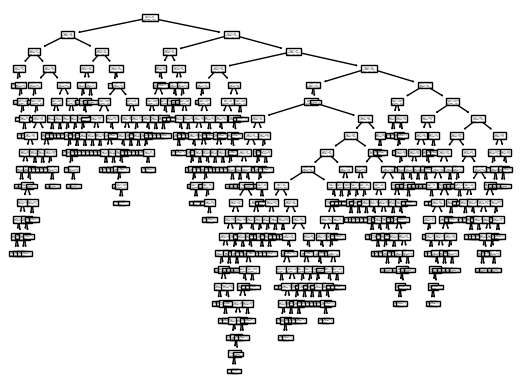

In [ ]:
tree.plot_tree(clf)

# **Support Vector Machines**

In [ ]:
data = df_ohe.copy()
train, test = train_test_split(data, test_size=0.2, random_state=42)

X_train, y_train = train.drop(columns=['Target']) ,train['Target']
X_test, y_test = test.drop(columns=['Target']), test['Target']

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print("linear kernel")
svm = SVC(kernel='linear')

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


print("")
print("rbf kernel")
svm = SVC(kernel='rbf')

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print('RBF Kernel')
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(cm)

linear kernel
Accuracy: 0.9049586776859504
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       277
           1       0.89      0.96      0.93       449

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.91      0.90      0.90       726

Confusion Matrix:
[[226  51]
 [ 18 431]]

rbf kernel
Accuracy: 0.8650137741046832
RBF Kernel
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       277
           1       0.84      0.96      0.90       449

    accuracy                           0.87       726
   macro avg       0.88      0.84      0.85       726
weighted avg       0.87      0.87      0.86       726

Confusion Matrix:
[[226  51]
 [ 18 431]]


# **Naive Bayes**


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from IPython.display import display # Just for solution

In [ ]:
url = 'https://drive.google.com/uc?id=1RkoTj_yc3o99xDfzmE8q7QFURhf3FwdS'
df = pd.read_csv(io.StringIO(requests.get(url).content.decode("utf-8")))
nb_df = df.copy()
# display(nb_df)

#preprocessing

#assign Target values and drop enrolled value
class_mapping = {'Dropout': 0, 'Graduate': 1, 'Enrolled' : 2}
nb_df['Target'] = df['Target'].map(class_mapping)
nb_df.drop(nb_df[nb_df["Target"]==2].index,inplace=True)

#drop dupes
nb_df.drop_duplicates(inplace=True)

#look for and fill any na with 0
print(nb_df.columns[nb_df.isna().any()])
nb_df = nb_df.fillna(0)

#manually drop some cat attributes
nb_df.drop(columns=['Marital status'], axis=1, inplace=True)
nb_df.drop(columns=['Nacionality'], axis=1, inplace=True)
nb_df.drop(columns=['Educational special needs'], axis=1, inplace=True)
nb_df.drop(columns=['International'], axis=1, inplace=True)
# display(nb_df)
# print(nb_df['Target'].unique())
# display(nb_df.columns.tolist())

#cats that will be used
#cats not used: 'International','Educational special needs','Nacionality','Marital status',
cats = ["Mother's occupation", "Father's occupation","Father's qualification","Mother's qualification",'Previous qualification','Daytime/evening attendance','Application mode','Debtor', 'Gender','Scholarship holder', 'Course','Tuition fees up to date','Displaced']
# cats = ['International','Educational special needs','Nacionality','Marital status',"Mother's occupation", "Father's occupation","Father's qualification","Mother's qualification",'Previous qualification','Daytime/evening attendance','Application mode','Debtor', 'Gender','Scholarship holder', 'Course','Tuition fees up to date','Displaced']
# display(nb_df)

#encoding using ordinalencoder()
nb_df = pd.DataFrame(preprocessing.OrdinalEncoder().fit_transform(nb_df), columns=nb_df.columns)
# display(nb_df)

Index([], dtype='object')


In [ ]:
#split data into train and test set with ratio of 80:20
# nb_df = df.copy()
nb_train, nb_test = train_test_split(nb_df, test_size=0.2, random_state=42)
X_nb_train, y_nb_train = nb_train.drop(columns=['Target']), nb_train['Target']
X_nb_test, y_nb_test = nb_test.drop(columns=['Target']), nb_test['Target']
print(X_nb_train.shape, X_nb_test.shape)
# print(nb_df.nunique())

(2904, 30) (726, 30)


**Naïve Bayes Classifier for Categorical Attributes**

In [ ]:
print("CATEGORICAL ATTRIBUTES USED:\n", cats)
#print(nb_df.nunique())
#using CategoricalNB()
# clf_cat = CategoricalNB()
clf_cat = CategoricalNB(min_categories=nb_df[cats].nunique())

clf_cat.fit(X_nb_train[cats], np.asarray(y_nb_train))

print("\nCLASSIFICATION REPORT:\n")
print(classification_report(y_nb_test, clf_cat.predict(X_nb_test[cats])))

CATEGORICAL ATTRIBUTES USED:
 ["Mother's occupation", "Father's occupation", "Father's qualification", "Mother's qualification", 'Previous qualification', 'Daytime/evening attendance', 'Application mode', 'Debtor', 'Gender', 'Scholarship holder', 'Course', 'Tuition fees up to date', 'Displaced']

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.69      0.64      0.66       277
         1.0       0.79      0.82      0.80       449

    accuracy                           0.75       726
   macro avg       0.74      0.73      0.73       726
weighted avg       0.75      0.75      0.75       726



**Naïve Bayes Classifier for Numerical Attributes**

In [ ]:
#using GaussianNB()

nums = [col for col in X_nb_train.columns if col not in cats]
print("NUMERICAL ATTRIBUTES USED:\n",nums)

clf_num = GaussianNB()
scaler = preprocessing.StandardScaler()
scaler.fit(X_nb_train[nums])

Z_nb_train = scaler.transform(X_nb_train[nums])
Z_nb_test = scaler.transform(X_nb_test[nums])

clf_num.fit(Z_nb_train, np.asarray(y_nb_train))

print("\nCLASSIFICATION REPORT:\n")
print(classification_report(y_nb_test, clf_num.predict(Z_nb_test)))

NUMERICAL ATTRIBUTES USED:
 ['Application order', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79       277
         1.0       0.86      0.90      0.88       449

    accuracy                           0.84       726
   macro avg       0.84      0.83      0.83       726
weighted avg       0.84      0.84      0.84       726



Dropping more categorical attributes don't seem to have much effect for the accuracy for Naive Bayes for Categorical Attributes. Dropping no attributes does not really effect the accuracy for categorical attributes either.

However, following previous models, the same four categorical attributes were still dropped:


*   Marital status
*   Nacionality
*   Educational special needs
*   International

Naive Bayes for Categorical Attributes seems to have accuracy numbers usually <80%.

Naive Bayes for Numerical Attributes seems to have accuracy numbers usually >=80%.

Hence, for our dataset, Naive Bayes seems to work better for Numerical Attributes.



